# Data explanation

 - 서울시의 구별 CCTV 현황을 분석
 - 구별 CCTV 데이터와 서울시 인구 데이터를 통해 <br>
   어느 구에 가장 많은 CCTV가 있는지, 구별 인구 현황, 구별 인구 대비 CCTV 비율 등 알아보기

# Importing Library

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

# Read file

In [2]:
pwd()

'/Users/juu/python/Try_python'

In [3]:
os.chdir('/Users/juu/python/Try_python/Data')

In [4]:
os.listdir()

['streetlamp.csv',
 '01. population_in_Seoul.xls',
 '01. CCTV_in_Seoul.csv',
 'icecream.csv',
 'iris.csv',
 '01. CCTV_result.csv']

In [5]:
cctv_seoul = pd.read_csv('01. CCTV_in_Seoul.csv', encoding = 'utf-8')
cctv_seoul.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [6]:
cctv_seoul.columns # 컬럼 확인

Index(['기관명', '소계', '2013년도 이전', '2014년', '2015년', '2016년'], dtype='object')

In [7]:
cctv_seoul.rename(columns = {cctv_seoul.columns[0] : '구별'}, inplace = True)
# inplace = True 는 변수 변경을 해당 데이터 내에서 갱신한다는 의미
cctv_seoul.columns[0]

'구별'

In [8]:
pop_seoul = pd.read_excel('01. population_in_Seoul.xls', encoding = 'utf-8')
pop_seoul.head()

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
0,기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
1,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자
2,2017.1/4,합계,4202888,10197604,5000005,5197599,9926968,4871560,5055408,270636,128445,142191,2.36,1321458
3,2017.1/4,종로구,72654,162820,79675,83145,153589,75611,77978,9231,4064,5167,2.11,25425
4,2017.1/4,중구,59481,133240,65790,67450,124312,61656,62656,8928,4134,4794,2.09,20764


**엑셀 파일 원본을 그대로 읽으면 시작 행이 3개이므로 데이터 분석하기에 적절하지 않다. 옵션을 적용하여 시작행을 설정해보자**

In [9]:
pop_seoul = pd.read_excel('01. population_in_Seoul.xls', encoding = 'utf-8',
                         header = 2, # 3행부터 읽기
                         parse_cols = 'B, D, G, J, N') # 특정 열만 읽기
pop_seoul.head()

/Users/juu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: the 'parse_cols' keyword is deprecated, use 'usecols' instead
  This is separate from the ipykernel package so we can avoid doing imports until


,자치구,계,계.1,계.2,65세이상고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [10]:
pop_seoul.rename(columns = {pop_seoul.columns[0] : '구별',
                           pop_seoul.columns[1] : '인구수',
                           pop_seoul.columns[2] : '한국인',
                           pop_seoul.columns[3] : '외국인',
                           pop_seoul.columns[4] : '고령자'},
                           inplace = True)
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [11]:
pop_seoul.drop([0], inplace = True) # 0번째 행은 필요 없기 때문에 삭제
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0


# Exploring Data

In [12]:
cctv_seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [13]:
cctv_seoul.sort_values(by = '소계', ascending = False).head() # 구별로 CCTV수의 내림차순 정렬

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
18,양천구,2034,1843,142,30,467
14,서초구,1930,1406,157,336,398
21,은평구,1873,1138,224,278,468
20,용산구,1624,1368,218,112,398


강남구, 양천구, 서초구, 은평구, 용산구가 cctv가 가장 많은 구이다

In [14]:
cctv_seoul.columns

Index(['구별', '소계', '2013년도 이전', '2014년', '2015년', '2016년'], dtype='object')

In [15]:
cctv_seoul['최근증가율'] = (cctv_seoul['2014년'] + cctv_seoul['2015년'] + cctv_seoul['2016년']) / cctv_seoul['2013년도 이전'] * 100
cctv_seoul.sort_values(by = '최근증가율', ascending = False).head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
22,종로구,1002,464,314,211,630,248.922414
9,도봉구,485,238,159,42,386,246.638655
12,마포구,574,314,118,169,379,212.101911
8,노원구,1265,542,57,451,516,188.929889
1,강동구,773,379,99,155,377,166.490765


최근 3년동안 증가율이 높은 구는 종로구, 도봉구, 마포구, 노원구이다.

In [16]:
pop_seoul['구별'].unique() # 어떤 구가 있는지 확인

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구', nan],
      dtype=object)

In [17]:
pop_seoul['구별'].isnull() # isnull 함수를 통해 nan 값을 확인 할 수 있다.

1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26     True
Name: 구별, dtype: bool

In [18]:
pop_seoul[pop_seoul['구별'].isnull()] # nan 값이 있는 부분만 데이터프레임으로 확인 

,구별,인구수,한국인,외국인,고령자
26,NaN,NaN,NaN,NaN,NaN


In [19]:
pop_seoul.drop([26], inplace = True)
pop_seoul[pop_seoul['구별'].isnull()]

,구별,인구수,한국인,외국인,고령자


In [20]:
pop_seoul['외국인비율'] = pop_seoul.iloc[:,3] / pop_seoul.iloc[:,1] * 100
pop_seoul['고령자비율'] = pop_seoul.iloc[:,4] / pop_seoul.iloc[:,1] * 100
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
4,성동구,311244.0,303380.0,7864.0,39997.0,2.526635,12.850689
5,광진구,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849


In [21]:
pop_seoul.sort_values(by = '인구수', ascending = False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
16,강서구,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
23,강남구,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
11,노원구,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


송파구, 강서구, 강남구, 노원구, 관악구 순으로 인구가 많다.

In [22]:
pop_seoul.sort_values(by = '외국인', ascending = False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402985.0,368072.0,34913.0,52413.0,8.663598,13.006191
17,구로구,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
18,금천구,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291
6,동대문구,369496.0,354079.0,15417.0,54173.0,4.172440,14.661322


영등포구, 구로구, 금천구, 관악구, 동대문구 순으로 외국인 수가 많다.

In [23]:
pop_seoul.sort_values(by = '외국인비율', ascending = False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402985.0,368072.0,34913.0,52413.0,8.663598,13.006191
18,금천구,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
17,구로구,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427


영등포구, 금천구, 구로구, 중구, 용산구 순으로 외국인 비율이 높다.

In [24]:
pop_seoul.sort_values(by = '고령자', ascending = False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
16,강서구,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
24,송파구,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
12,은평구,494388.0,489943.0,4445.0,72334.0,0.899091,14.631019
11,노원구,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


강서구, 송파구, 은평구, 노원구, 관악구 순으로 고령자가 많다.

In [25]:
pop_seoul.sort_values(by = '고령자비율', ascending = False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
9,강북구,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
13,서대문구,327163.0,314982.0,12181.0,48161.0,3.723221,14.720797


강북구, 종로구, 중구, 용산구, 서대문구 순으로 고령자 비율이 높다.

In [26]:
data_total = pd.merge(cctv_seoul, pop_seoul, on = '구별') # 공통된 컬럼인 '구별'을 기준으로 두 데이터를 합친다.
data_total.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,1292,430,584,932,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,379,99,155,377,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,369,120,138,204,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,388,258,184,81,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,846,260,390,613,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [27]:
data_total.columns

Index(['구별', '소계', '2013년도 이전', '2014년', '2015년', '2016년', '최근증가율', '인구수',
       '한국인', '외국인', '고령자', '외국인비율', '고령자비율'],
      dtype='object')

In [28]:
del data_total['2013년도 이전']
del data_total['2014년']
del data_total['2015년']
del data_total['2016년']
data_total.head()

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


필요 없는 컬럼 지우기

In [29]:
data_total.index # 현재 인덱스

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24],
           dtype='int64')

In [30]:
data_total.set_index('구별', inplace = True) # 인덱스 재설정, 구별 기준으로 변인간 비교하기 위해 재설정

# Correlation analysis

 - 상관분석(Correlation analysis)은 두 변수간에 어떤 선형적 관계가 있는지 분석하는 방법
 - 즉, 하나의 변수가 다른 변수와 어느 정도로 밀접한 관련성이 있나 보는 것
 - 데이터를 비교하는 가장 단순한 작업 중 하나가 상관계수를 조사하는 것이다.
 - 상관계수의 절대값이 클 수록 두 데이터는 관계가 있다고 볼 수 있다.
 - 상관계수는 두 변인의 상관도(얼마나 연관 있는지)를 말해주는 것이지 인과관계를 표현하는 것이 아니다. <br>
   (인과관계는 회귀분석을 해보자!)

## corrcoef로 상관계수 구하기

In [31]:
np.corrcoef(data_total['고령자비율'], data_total['소계']) # 고령자비율과 cctv 수량간의 상관관계

array([[ 1.        , -0.28078554],
       [-0.28078554,  1.        ]])

약한 음의 상관관계 / 고령자 비율이 높을 수록 cctv 수량은 적어진다.

In [32]:
np.corrcoef(data_total['외국인비율'], data_total['소계']) # 외국인비율과 cctv 수량간의 상관관계

array([[ 1.        , -0.13607433],
       [-0.13607433,  1.        ]])

거의 상관 없음

In [33]:
np.corrcoef(data_total['인구수'], data_total['소계']) # 인구수와 cctv 수량간의 상관관계

array([[1.        , 0.30634228],
       [0.30634228, 1.        ]])

약한 양의 상관관계 / 인구수가 많을 수록 cctv 수량도 많아진다.

# Visuallization

In [34]:
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin' :
    rc('font', family = 'Applegothic')
elif platform.system() == 'Windows' :
    path = 'c:/Window/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family = font_name)
else : 
    print('Unknow system') 
    
# matplotlib 한글 폰트 지원

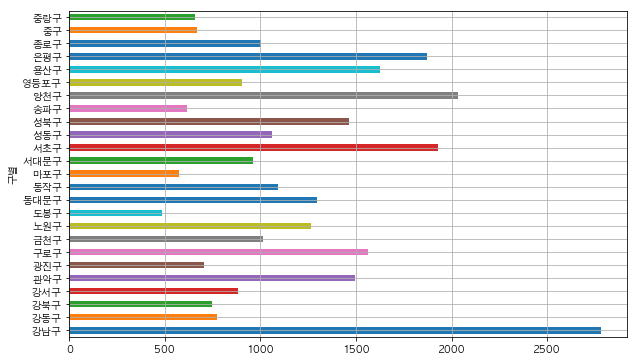

In [35]:
plt.figure(figsize = (10,6))
data_total['소계'].plot(kind = 'barh', # horizoltal bar plot
                     grid = True)
plt.show()

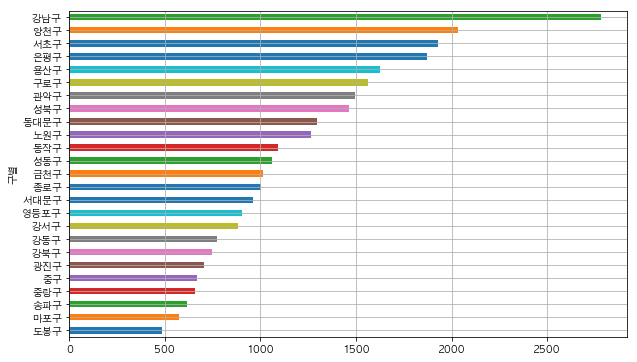

In [36]:
plt.figure(figsize = (10,6))
data_total['소계'].sort_values().plot(kind = 'barh', grid = True)
plt.show()

bar plot을 통해 cctv 수량을 구별로 시각화

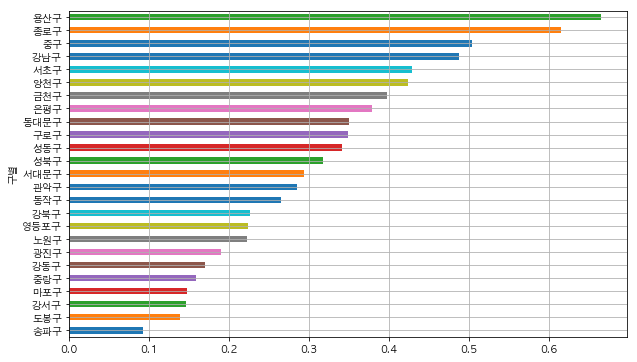

In [37]:
data_total['cctv비율'] = data_total['소계'] / data_total['인구수'] * 100
data_total['cctv비율'].sort_values().plot(kind = 'barh', grid = True, figsize = (10,6))
plt.show()

bar plot을 통해 cctv 비율을 구별로 시각화 / 용산구가 cctv 비율이 가장 높다

## Linear regression

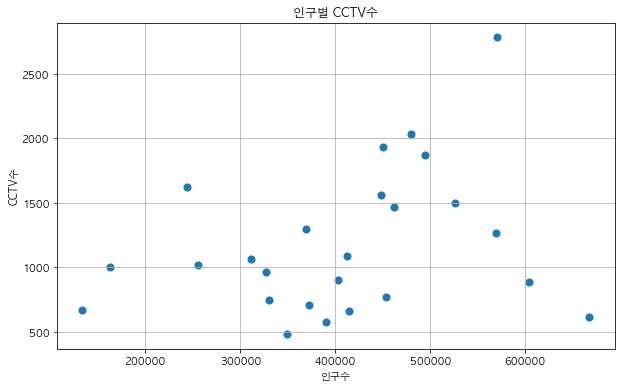

In [38]:
plt.figure(figsize = (10,6))
plt.scatter(data_total['인구수'], data_total['소계'], s = 50) # s : 마커 크기
plt.xlabel('인구수')
plt.ylabel('CCTV수')
plt.title('인구별 CCTV수')
plt.grid()
plt.show()

상관 분석에서 나타난 것 처럼 인구수와 CCTV 수는 약한 양의 상관관계를 보인다.

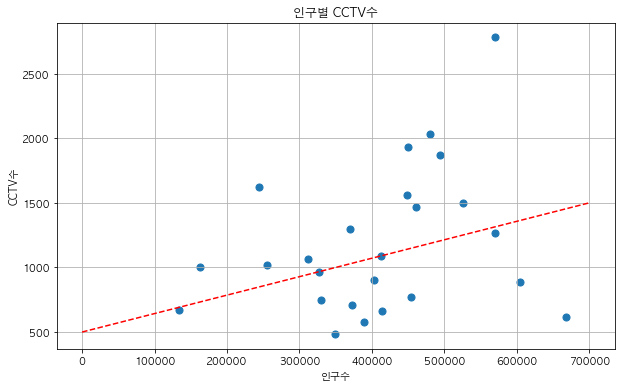

In [39]:
t = np.arange(0,700000, 0.01)
y = 10/7000*t + 500

plt.figure(figsize = (10,6))
plt.scatter(data_total['인구수'], data_total['소계'], s = 50)
plt.plot(t, y, color = 'r', ls = 'dashed')
plt.xlabel('인구수')
plt.ylabel('CCTV수')
plt.title('인구별 CCTV수')
plt.grid()
plt.show()

눈 대중으로 보면 이런 느낌의 회귀선이 그려질 것 같은데 선형 패턴을 찾으려면 어떻게 해야할까?

## Regression line

In [40]:
from PIL import Image
import requests
from io import BytesIO

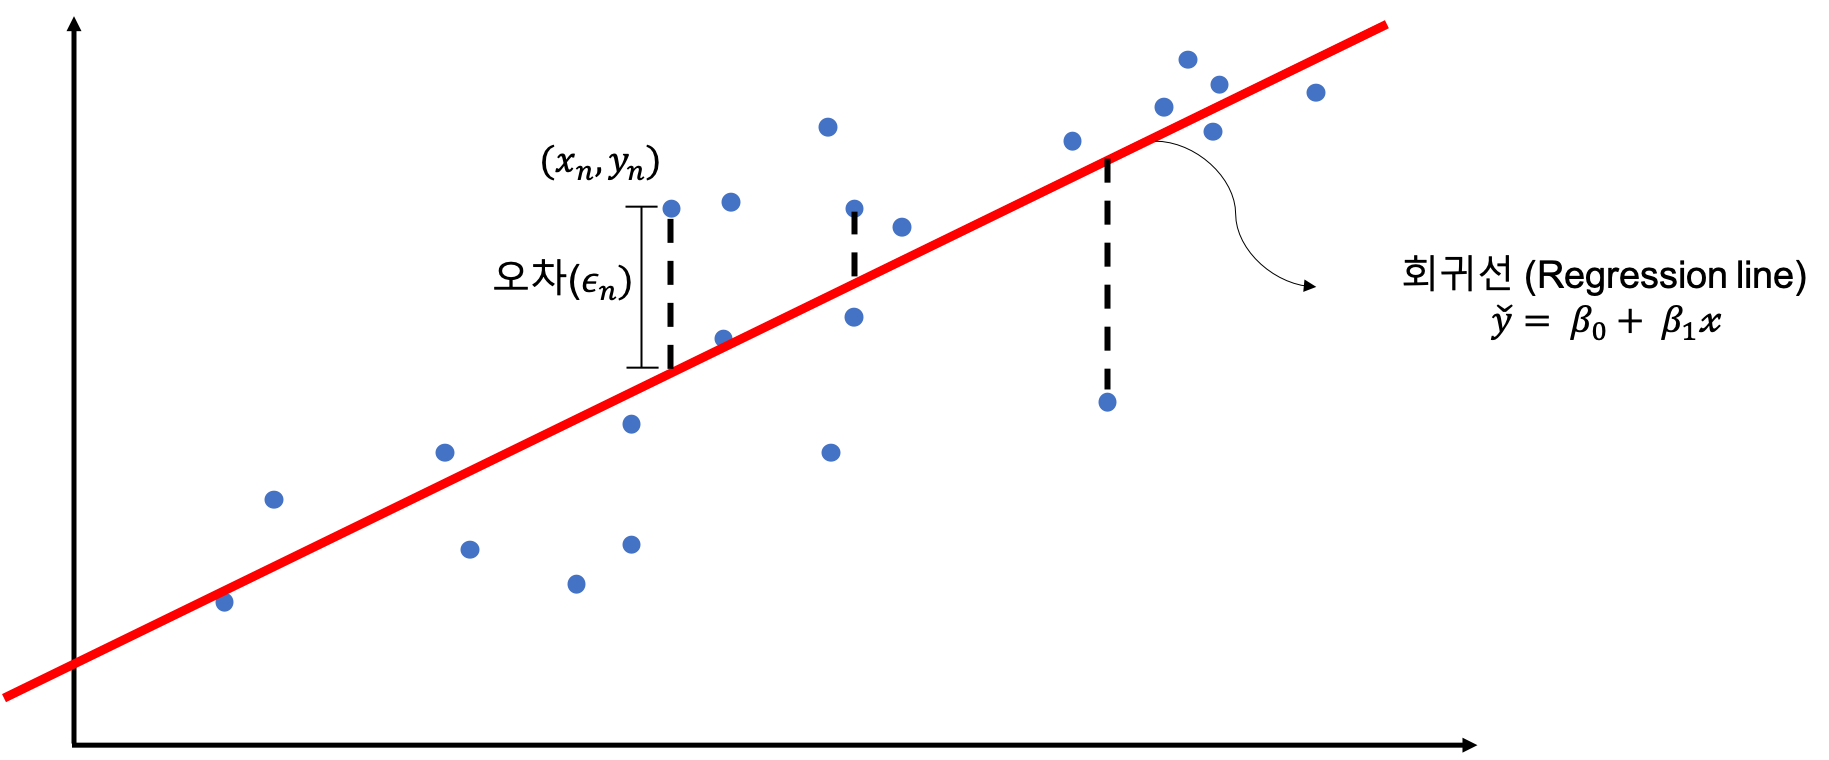

In [41]:
response = requests.get("https://blogfiles.pstatic.net/MjAxOTAzMjRfMjQ0/MDAxNTUzNDA2MzY5NTQ5.c6peUKLoo2lcwZITd2As-P8gayvDrRPwmE9bCb7PW08g.Fdef0djryyMLay_KM7k9dcEsfQ774ruq3gc7zGBO870g.PNG.dlwngud37/regressionline.png")
img = Image.open(BytesIO(response.content))
img

 - 데이터의 분포를 보고 그 데이터의 추세를 예측하기 위해 직선이나 포물선을 선택해 해석하는 것을 모델 선택이라 한다.
 - 모델이 결정되면 모델의 파라미터가 정해지는데 직선의 경우에는 기울기와 y절편이 파라미터이다.
 - 직선에 대한 오차가 적을 수록 그 직선은 데이터를 잘 추정한다고 볼 수 있다.
 - 그렇다면 오차가 가장 적은 직선(모델)을 구하려면 어떻게 해야 할까?
 - 최소제곱법은 모델의 파라미터를 구하기 위한 대표적 방법 중 하나이다.
 - 최소제곱법이란 근사적으로 구하는 해와 실제 해의 오차의 제곱의 합이 최소가 되는 해를 구하는 방법이다.

In [42]:
# polyfit (; polynomial curve fitting) : 다항식 곡선 적합 에서 따온 말
# polyfit() 함수는 입력과 출력 값으로 다항식의 계수를 찾아주는 것이다.
# p = ployfit(x,y,n)
# x는 다항식의 입력값, y는 다항식의 결과값, n은 차수를 의미
# 폴리핏은 이름은 곡선 적합이지만 1차 직선도 가능하기 때문에 이걸 사용

### 계수 구하기 (기울기와 y절편)

In [43]:
fp1 = np.polyfit(data_total['인구수'], data_total['소계'], 1) # (x입력값, y입력값, 차수)
fp1

array([1.30916415e-03, 6.45066497e+02])

따라서 회귀선은 <br>
y = 1.30916415e-03x + 6.45066497e+02 모양 <br>
하지만 지금 나온 값은 계수지 함수식이 아니므로 함수식을 만들어보자

In [44]:
# np.poly1d (; 1-dimensional polynomial class)
# 입력값을 통해 함수식을 만들어준다.

In [45]:
np.poly1d([1,1]) + np.poly1d([1,-1]) # (1차 다항식의 계수, 상수항)
# (x+1) + (x-1) = 2x

poly1d([2, 0])

In [46]:
np.poly1d([1, 1]) * np.poly1d([1,-1])
# (x+1)(x-1) = x*2-1

poly1d([ 1,  0, -1])

In [47]:
max(data_total['인구수'])

667483.0

In [48]:
min(data_total['인구수'])

133240.0

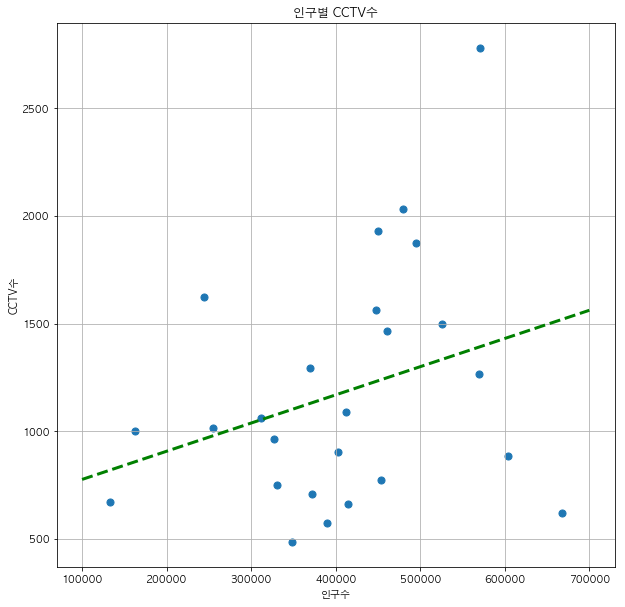

In [49]:
f1 = np.poly1d(fp1) # 계수를 통해 만든 함수식
fx = np.linspace(100000, 700000, 100) # 인구수의 최솟값, 최댓값을 모두 포함하기 위한 배열

plt.figure(figsize = (10,10))
plt.scatter(data_total['인구수'], data_total['소계'], s = 50)
plt.plot(fx, f1(fx), ls = 'dashed', lw = 3, color = 'g')
plt.xlabel('인구수')
plt.ylabel('CCTV수')
plt.title('인구별 CCTV수')
plt.grid()
plt.show()

In [50]:
fp1 = np.polyfit(data_total['인구수'], data_total['소계'], 1)

f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 100)

data_total['오차'] = np.abs(data_total['소계'] - f1(data_total['인구수'])) # 오차의 직선 거리

df_sort = data_total.sort_values(by = '오차', ascending = False) # 오차가 큰 구를 내림차순으로 정렬
df_sort.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,cctv비율,오차
구별,,,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,0.487292,1388.055355
송파구,618,104.347826,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599,0.092587,900.911312
양천구,2034,34.671731,479978.0,475949.0,4029.0,52975.0,0.839413,11.036964,0.423769,760.563512
서초구,1930,63.371266,450310.0,445994.0,4316.0,51733.0,0.958451,11.488308,0.428594,695.403794
용산구,1624,53.216374,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427,0.665020,659.231690


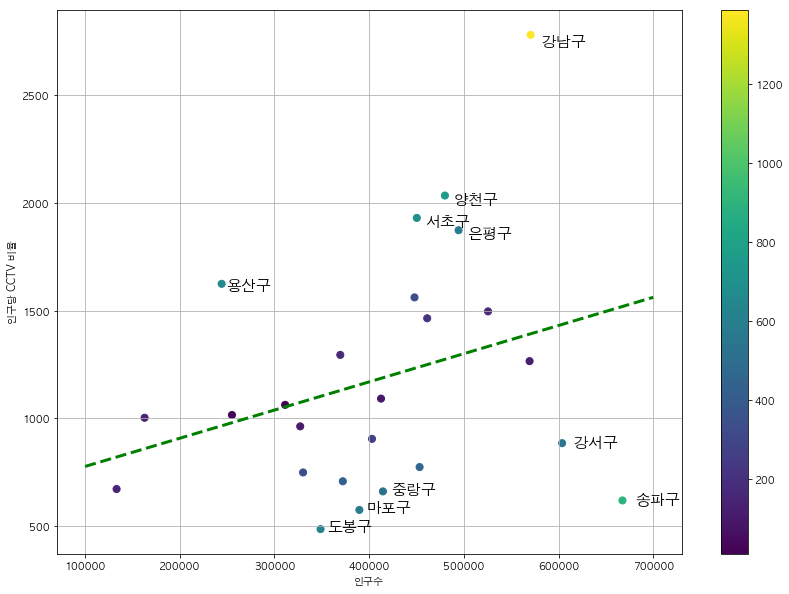

In [51]:
plt.figure(figsize = (14, 10))
plt.scatter(data_total['인구수'], data_total['소계'],
            c = data_total['오차'], s = 50)
plt.plot(fx, f1(fx), ls = 'dashed', lw = 3, color = 'g')

for n in range(10):
    plt.text(df_sort['인구수'][n]*1.02, df_sort['소계'][n]*0.98,
            df_sort.index[n], fontsize = 15)
# text(x,y,str) / 상위 10개만 텍스트를 보이게 함 / 마커와 텍스트가 겹치지 않도록 우로 2%, 아래로 2% 옮겨줌
    
plt.xlabel('인구수')
plt.ylabel('인구당 CCTV 비율')

plt.colorbar()
plt.grid()
plt.show()